# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

#convert UNIX time to String 
from datetime import datetime  

# Import My API key  
from api_keys import api_key
#api_key = "c812965f3b858aaacfcb1d520a8d9fa5"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#check city/country by latitude & longitude
ciudad = citipy.nearest_city(37.56, 126.97)
print(ciudad.city_name+" in "+ciudad.country_code)

seoul in kr


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#call API : https://samples.openweathermap.org/data/2.5/weather?q=London&appid=b6907d289e10d714a6e88b30761fae22 
url = "https://api.openweathermap.org/data/2.5/weather?q="

#one sample
#cities = ["London"]

# inicialize values
urlstr=""
num = 1 
num_set = 1 

a1 = []
b1 = []
c1 = []
d1 = []
e1 = []
f1 = []
g1 = []
h1 = []
i1 = []

#Colums = {"City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"}


print("Beginning Data Retrieval")
print("------------------------")


#get API's value from cities
for x in cities: 
    urlstr = url + x + '&appid=' + api_key

    response = requests.get(urlstr)
    city_data = response.json()
    
    #checker : 
    #print(urlstr)
    #response.url 
    #response.status
    
    #check if there is a result
    codigo = int(city_data["cod"])
    if codigo < 300:
        
        city_data = response.json()
        
        #add to lists
        a1.append(city_data["name"])                #City
        b1.append(city_data["clouds"]["all"])       #Cloudiness
        c1.append(city_data["sys"]["country"])      #Country
        d1.append(city_data["dt"])                  #Date
        e1.append(city_data["main"]["humidity"])    #Humidity
        f1.append(city_data["coord"]["lat"])        #Lat
        g1.append(city_data["coord"]["lon"])        #Lng
        h1.append(city_data["main"]["temp_max"])    #Max Temp
        i1.append(city_data["wind"]["speed"])       #Wind Speed
        j = city_data["id"]                  #City Id = City number        

#display json
#print(json.dumps(city_data, indent=4, sort_keys=True))

        print("Processing Record "+ str(num) +" of Set "+str(num_set)+" | "+city_data["name"]+" id= "+str(j))
        num = num + 1
        if num == 51:
            num = 1
            num_set = num_set+1
    else:
        print("City not found. Skipping... - "+x)

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | New Norfolk id= 2155415
Processing Record 2 of Set 1 | Saint-Philippe id= 6138908
Processing Record 3 of Set 1 | Lagoa id= 2267254
Processing Record 4 of Set 1 | Caravelas id= 3466980
City not found. Skipping... - grand river south east
Processing Record 5 of Set 1 | Tasiilaq id= 3424607
City not found. Skipping... - mys shmidta
Processing Record 6 of Set 1 | Albany id= 5106834
Processing Record 7 of Set 1 | Cape Town id= 3369157
Processing Record 8 of Set 1 | College id= 5859699
Processing Record 9 of Set 1 | Hasaki id= 2112802
Processing Record 10 of Set 1 | Carnarvon id= 1014034
Processing Record 11 of Set 1 | Katsuura id= 1865309
Processing Record 12 of Set 1 | Idrinskoye id= 1505998
Processing Record 13 of Set 1 | Kolaras id= 1266302
Processing Record 14 of Set 1 | Ushuaia id= 3833367
Processing Record 15 of Set 1 | Port Alfred id= 964432
City not found. Skipping... - belushya guba
Processing Record 1

Processing Record 46 of Set 3 | Chokurdakh id= 2126123
Processing Record 47 of Set 3 | Malanje id= 2239862
Processing Record 48 of Set 3 | Preobrazheniye id= 2017658
Processing Record 49 of Set 3 | Sabang id= 1726279
Processing Record 50 of Set 3 | Babol id= 142363
City not found. Skipping... - bacuit
Processing Record 1 of Set 4 | Gat id= 2249901
Processing Record 2 of Set 4 | Astana id= 1526273
Processing Record 3 of Set 4 | Aswan id= 359792
Processing Record 4 of Set 4 | Upata id= 3625710
Processing Record 5 of Set 4 | Kaitangata id= 2208248
Processing Record 6 of Set 4 | Butaritari id= 2110227
Processing Record 7 of Set 4 | Kodiak id= 4407665
Processing Record 8 of Set 4 | Amapa id= 3603330
City not found. Skipping... - bardiyah
Processing Record 9 of Set 4 | Lorengau id= 2092164
Processing Record 10 of Set 4 | Reading id= 5207728
Processing Record 11 of Set 4 | Dillon id= 5648657
Processing Record 12 of Set 4 | Lagos id= 2332459
Processing Record 13 of Set 4 | Tibacuy id= 3682274


Processing Record 39 of Set 6 | Amazar id= 2027806
Processing Record 40 of Set 6 | Kibuye id= 202065
City not found. Skipping... - ijaki
City not found. Skipping... - waw
Processing Record 41 of Set 6 | La Ronge id= 6050066
Processing Record 42 of Set 6 | Port Hedland id= 2063042
Processing Record 43 of Set 6 | Pontianak id= 1630789
Processing Record 44 of Set 6 | Touros id= 3386213
Processing Record 45 of Set 6 | The Pas id= 6164499
Processing Record 46 of Set 6 | Vila Velha id= 6320062
Processing Record 47 of Set 6 | Digby id= 5939236
Processing Record 48 of Set 6 | Ndola id= 901344
Processing Record 49 of Set 6 | Tono id= 2110735
Processing Record 50 of Set 6 | Burirao id= 7521304
City not found. Skipping... - portpatrick
Processing Record 1 of Set 7 | Vestmanna id= 2610343
Processing Record 2 of Set 7 | Djibo id= 2361177
Processing Record 3 of Set 7 | Quelimane id= 1028434
Processing Record 4 of Set 7 | Cayenne id= 3382160
Processing Record 5 of Set 7 | Awjilah id= 88533
Processing

Processing Record 36 of Set 9 | Kharp id= 1503726
Processing Record 37 of Set 9 | Fairbanks id= 5861897
City not found. Skipping... - tarudant
Processing Record 38 of Set 9 | Bulgan id= 2032201
Processing Record 39 of Set 9 | Meulaboh id= 1214488
Processing Record 40 of Set 9 | Monte Alegre id= 3394605
Processing Record 41 of Set 9 | Bubaque id= 2374583
Processing Record 42 of Set 9 | Tabou id= 2281120
Processing Record 43 of Set 9 | Sai Buri id= 1606851
Processing Record 44 of Set 9 | Juybar id= 129933
Processing Record 45 of Set 9 | Nelson Bay id= 2155562
Processing Record 46 of Set 9 | Conde id= 3465713
Processing Record 47 of Set 9 | Morehead id= 4301307
Processing Record 48 of Set 9 | San Joaquin id= 1689597
Processing Record 49 of Set 9 | Russell id= 4278471
Processing Record 50 of Set 9 | Nerchinskiy Zavod id= 2019323
City not found. Skipping... - mullaitivu
Processing Record 1 of Set 10 | Necochea id= 3430443
Processing Record 2 of Set 10 | Port Antonio id= 3489005
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create DataFrame
weather_data = {"City":a1,"Cloudiness":b1,"Country":c1,"Date":d1,"Humidity":e1,"Lat":f1,"Lng":g1,"Max Temp":h1,"Wind Speed":i1}
weather_data = pd.DataFrame(weather_data)

In [6]:
#Export the city data into a .csv
weather_data.to_csv(output_data_file, index=False)

In [7]:
#display the DataFrame
weather_data.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [8]:
#calculate time
ts = weather_data["Date"].max()
maxDate = datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
maxDate

'09/08/19'

In [9]:
ts = weather_data["Date"].min()
minDate = datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')
minDate

'09/08/19'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

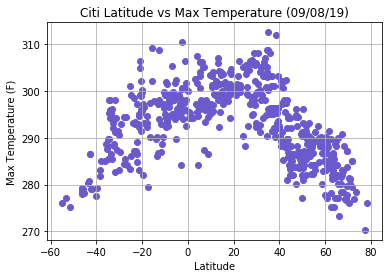

In [10]:
#weather_data.plot(kind='scatter',x='Lat',y='Max Temp',color='blue')
#plt.show()

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", color='slateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Max Temperature ("+maxDate+")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

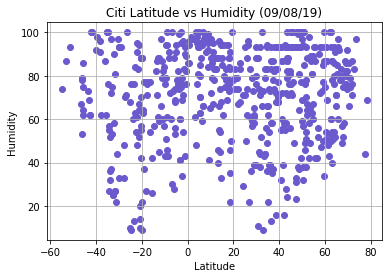

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", color='slateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Humidity ("+maxDate+")")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

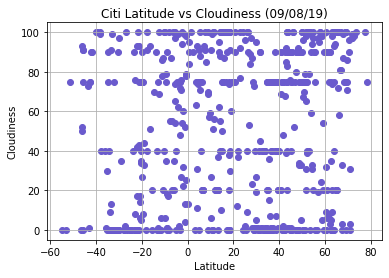

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", color='slateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Cloudiness ("+maxDate+")")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

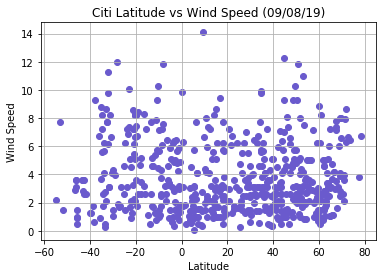

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", color='slateblue')

# Incorporate the other graph properties
plt.title("Citi Latitude vs Wind Speed ("+maxDate+")")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude-Wind Speed.png")

# Show plot
plt.show()